<a href="https://colab.research.google.com/github/Dima2865/SII_Labs/blob/main/Lab_3_SII.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Кластеризация.
Ссылка на датасет https://drive.google.com/file/d/1gMKTq3cjpXkcPDXlDFAq8Cv3gJEucZwF/view?usp=share_link

In [ ]:
library(ggplot2)
library(tidyr)
library(RColorBrewer)

In [ ]:
# скачиваем датасет с локального хранилища  
system("gdown --id 1gMKTq3cjpXkcPDXlDFAq8Cv3gJEucZwF")
system("ls", TRUE)

dataset = read.csv("Cust_Segmentation.csv")

[1] "Cust_Segmentation.csv" "sample_data"

In [ ]:
# смотрим на данные
str(dataset)
head(dataset)
any(is.na(dataset))
summary(dataset)

'data.frame':	850 obs. of  10 variables:
 $ Customer.Id    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Age            : int  41 47 33 29 47 40 38 42 26 47 ...
 $ Edu            : int  2 1 2 2 1 1 2 3 1 3 ...
 $ Years.Employed : int  6 26 10 4 31 23 4 0 5 23 ...
 $ Income         : int  19 100 57 19 253 81 56 64 18 115 ...
 $ Card.Debt      : num  0.124 4.582 6.111 0.681 9.308 ...
 $ Other.Debt     : num  1.073 8.218 5.802 0.516 8.908 ...
 $ Defaulted      : int  0 0 1 0 0 NA 0 0 NA 0 ...
 $ Address        : chr  "NBA001" "NBA021" "NBA013" "NBA009" ...
 $ DebtIncomeRatio: num  6.3 12.8 20.9 6.3 7.2 10.9 1.6 6.6 15.5 4 ...


,Customer.Id,Age,Edu,Years.Employed,Income,Card.Debt,Other.Debt,Defaulted,Address,DebtIncomeRatio
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<chr>,<dbl>
1,1,41,2,6,19,0.124,1.073,0,NBA001,6.3
2,2,47,1,26,100,4.582,8.218,0,NBA021,12.8
3,3,33,2,10,57,6.111,5.802,1,NBA013,20.9
4,4,29,2,4,19,0.681,0.516,0,NBA009,6.3
5,5,47,1,31,253,9.308,8.908,0,NBA008,7.2
6,6,40,1,23,81,0.998,7.831,NA,NBA016,10.9


[1] TRUE

  Customer.Id         Age             Edu        Years.Employed  
 Min.   :  1.0   Min.   :20.00   Min.   :1.000   Min.   : 0.000  
 1st Qu.:213.2   1st Qu.:29.00   1st Qu.:1.000   1st Qu.: 3.000  
 Median :425.5   Median :34.00   Median :1.000   Median : 7.000  
 Mean   :425.5   Mean   :35.03   Mean   :1.711   Mean   : 8.566  
 3rd Qu.:637.8   3rd Qu.:41.00   3rd Qu.:2.000   3rd Qu.:13.000  
 Max.   :850.0   Max.   :56.00   Max.   :5.000   Max.   :33.000  
                                                                 
     Income         Card.Debt         Other.Debt       Defaulted     
 Min.   : 13.00   Min.   : 0.0120   Min.   : 0.046   Min.   :0.0000  
 1st Qu.: 24.00   1st Qu.: 0.3825   1st Qu.: 1.046   1st Qu.:0.0000  
 Median : 35.00   Median : 0.8850   Median : 2.003   Median :0.0000  
 Mean   : 46.68   Mean   : 1.5768   Mean   : 3.079   Mean   :0.2614  
 3rd Qu.: 55.75   3rd Qu.: 1.8985   3rd Qu.: 3.903   3rd Qu.:1.0000  
 Max.   :446.00   Max.   :20.5610   Max.   :35.197  

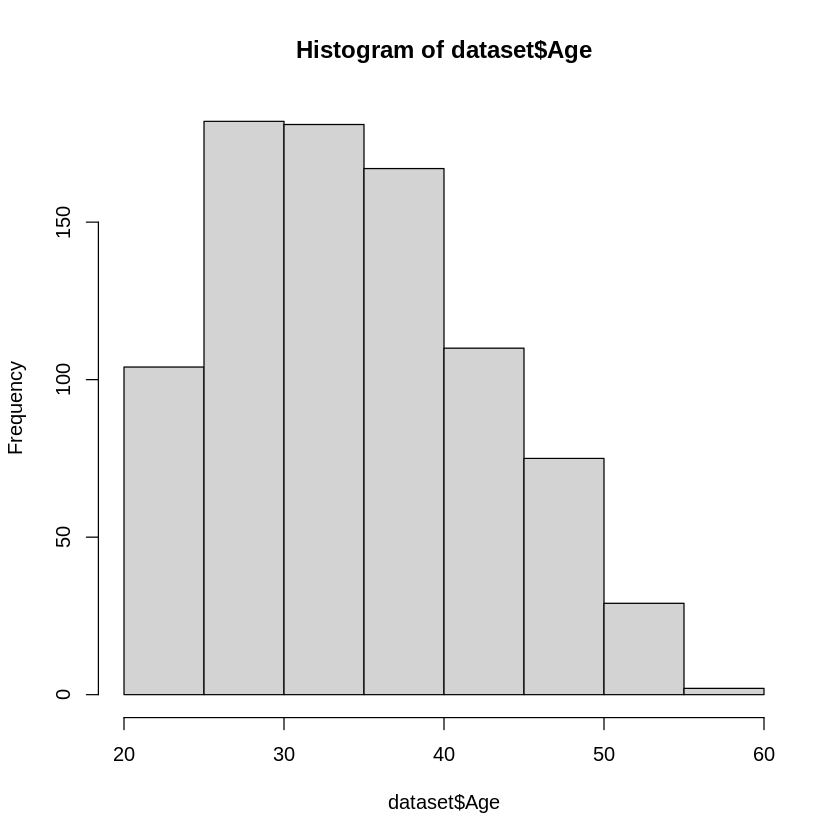

In [ ]:
hist(dataset$Age)

Представлена информация о покупателях (850 записей) - возразст (Age), лет образования (Edu), стаж работы (Years.Employed), доход (Income), а так же информация по кредитам (?), адрес. Есть строковые данные! Есть пропуски в данных!


Попробуем выделить кластеры покупателей (целевых групп)

In [ ]:
# предобработка: уберем пропуски в данных; удалим нецелевые признаки; 
df0 = data.frame(dataset)
df0 <- na.omit(df0)

df = subset(df0, select = -c(Customer.Id, Address))

any(is.na(df))
nrow(df)

[1] FALSE

[1] 700

In [ ]:
# нормализуем данные
df_scaled <- data.frame(scale(df))

head(df_scaled)
nrow(df_scaled)

,Age,Edu,Years.Employed,Income,Card.Debt,Other.Debt,Defaulted,DebtIncomeRatio
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.7677551,0.2985792,-0.3587500,-0.7225856,-0.6752165,-0.6038525,-0.5945246,-0.5801137
2,1.5180043,-0.7787684,2.6451375,1.4776508,1.4303987,1.5694981,-0.5945246,0.3719557
3,-0.2325773,0.2985792,0.2420275,0.3096241,2.1525803,0.8346045,1.6796133,1.5583806
4,-0.7327434,0.2985792,-0.6591387,-0.7225856,-0.4121327,-0.7732796,-0.5945246,-0.5801137
5,1.5180043,-0.7787684,3.3961094,5.6336528,3.6625964,1.7793808,-0.5945246,-0.4482887
7,0.3926304,0.2985792,-0.6591387,0.2824607,-0.5250179,-0.7921386,-0.5945246,-1.2685330


[1] 700

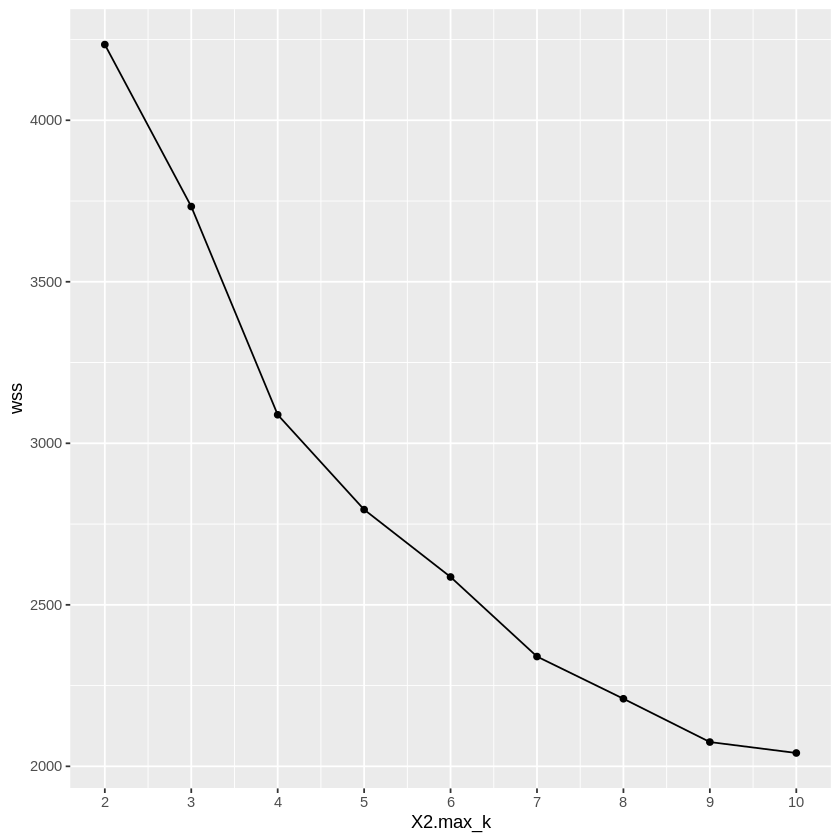

In [ ]:
set.seed(42)

# функция запускает алгоритм k-mean и сохраняет сумму квадратов расстояния в кластерах
kmean_withinss <- function(dataset, k) {
    cluster <- kmeans(dataset, k)
    return (cluster$tot.withinss)
}

# Set maximum cluster 
max_k <- 10 
# Run algorithm over a range of k 
wss <- sapply(2:max_k, kmean_withinss, dataset = df_scaled)

# Create a data frame to plot the graph
elbow <-data.frame(2:max_k, wss)

# Plot the graph with gglop
ggplot(elbow, aes(x = X2.max_k, y = wss)) +
    geom_point() +
    geom_line() +
    scale_x_continuous(breaks = seq(1, max_k, by = 1))

Резкого уменьшения суммы квадратичной ошибки (точка локтя) при переборе кластеров не наблюдается. Для простоты примем за оптимальное количество кластеров 3.

In [ ]:
optimal_k <- 3

# create clustering model
clust <- kmeans(df_scaled, optimal_k)

In [ ]:
# информация о кластерах
clust$centers
clust$size

,Age,Edu,Years.Employed,Income,Card.Debt,Other.Debt,Defaulted,DebtIncomeRatio
1,-0.4368377,0.1379808,-0.7057830,-0.4106281,-0.03087431,-0.0983392,1.6231129,0.5383518
2,-0.1416654,-0.1307985,-0.1116911,-0.2541151,-0.36153484,-0.3983165,-0.5945246,-0.3923533
3,1.0318428,0.2554853,1.2789695,1.3705183,1.23716950,1.4458851,-0.1215039,0.6060769


[1] 161 414 125

In [ ]:
# присвоим метки кластеров исходному набору данных
df$Cluster <- clust$cluster
df$Cluster.Label <- as.character(clust$cluster)

df_scaled$Cluster <- clust$cluster
df_scaled$Cluster.Label <- as.character(clust$cluster)

head(df)

,Age,Edu,Years.Employed,Income,Card.Debt,Other.Debt,Defaulted,DebtIncomeRatio,Cluster,Cluster.Label
,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<dbl>,<int>,<chr>
1,41,2,6,19,0.124,1.073,0,6.3,2,2
2,47,1,26,100,4.582,8.218,0,12.8,3,3
3,33,2,10,57,6.111,5.802,1,20.9,1,1
4,29,2,4,19,0.681,0.516,0,6.3,2,2
5,47,1,31,253,9.308,8.908,0,7.2,3,3
7,38,2,4,56,0.442,0.454,0,1.6,2,2


In [ ]:
# Make plots wider 
options(repr.plot.width=15, repr.plot.height=8)

In [ ]:
# Построим тепловую карту
center <- clust$centers

# Create dataset with the cluster number
cluster <- c(1:nrow(center))
center_df <- data.frame(cluster, center)

# Reshape the data
center_reshape <- gather(center_df, features, values, Age:DebtIncomeRatio)
head(center_reshape)

,cluster,features,values
,<int>,<chr>,<dbl>
1,1,Age,-0.4368377
2,2,Age,-0.1416654
3,3,Age,1.0318428
4,1,Edu,0.1379808
5,2,Edu,-0.1307985
6,3,Edu,0.2554853


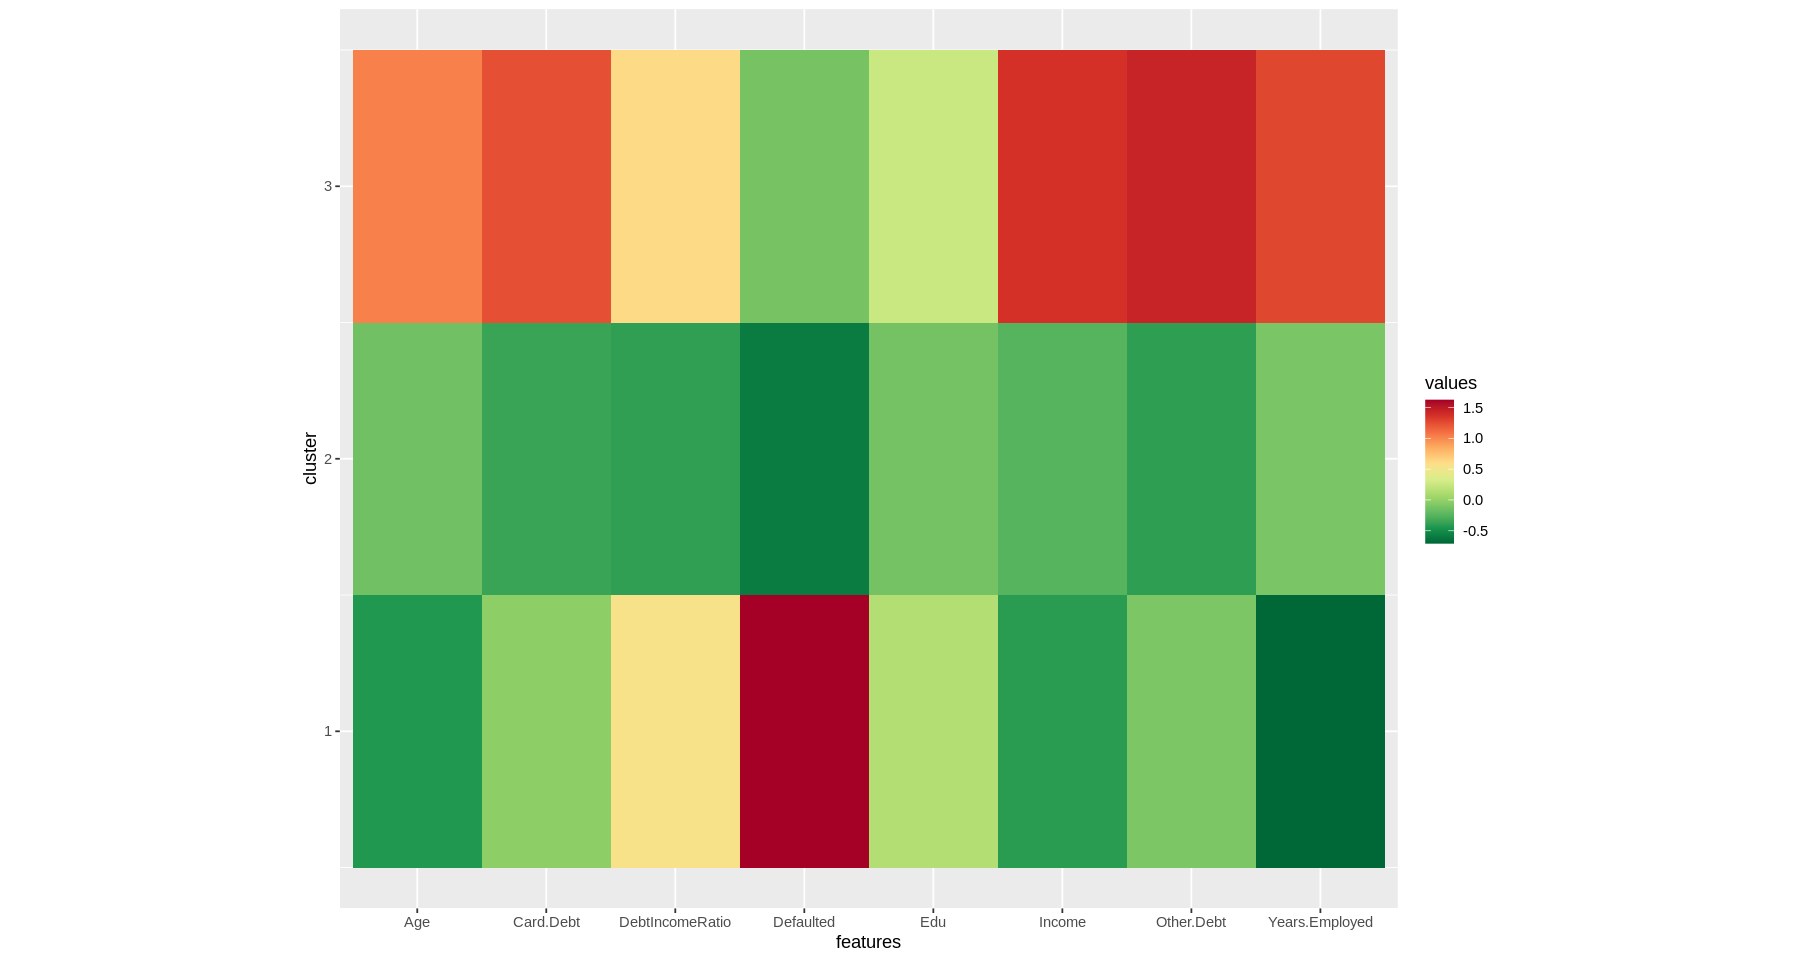

In [ ]:
# Create the palette
hm.palette <-colorRampPalette(rev(brewer.pal(10, 'RdYlGn')), space='Lab')

# Plot the heat map
ggplot(data = center_reshape, aes(x = features, y = cluster, fill = values)) +
    scale_y_continuous(breaks = seq(1, 8, by = 1)) +
    geom_tile() +
    coord_equal() +
    scale_fill_gradientn(colours = hm.palette(50)) +
    theme(aspect.ratio = 0.85)

Положительные значения указывают, что z-показатель для данного кластера выше общего среднего значения. Например, кластер 3 содержит покупателей с наиболее высоким доходом. В кластере 1 достаточно молодые и не таким большим стажем. В кластере 2 скорее средняя по всем показателям категория граждан. Т.е. вырисовываются определенные целевые категории.

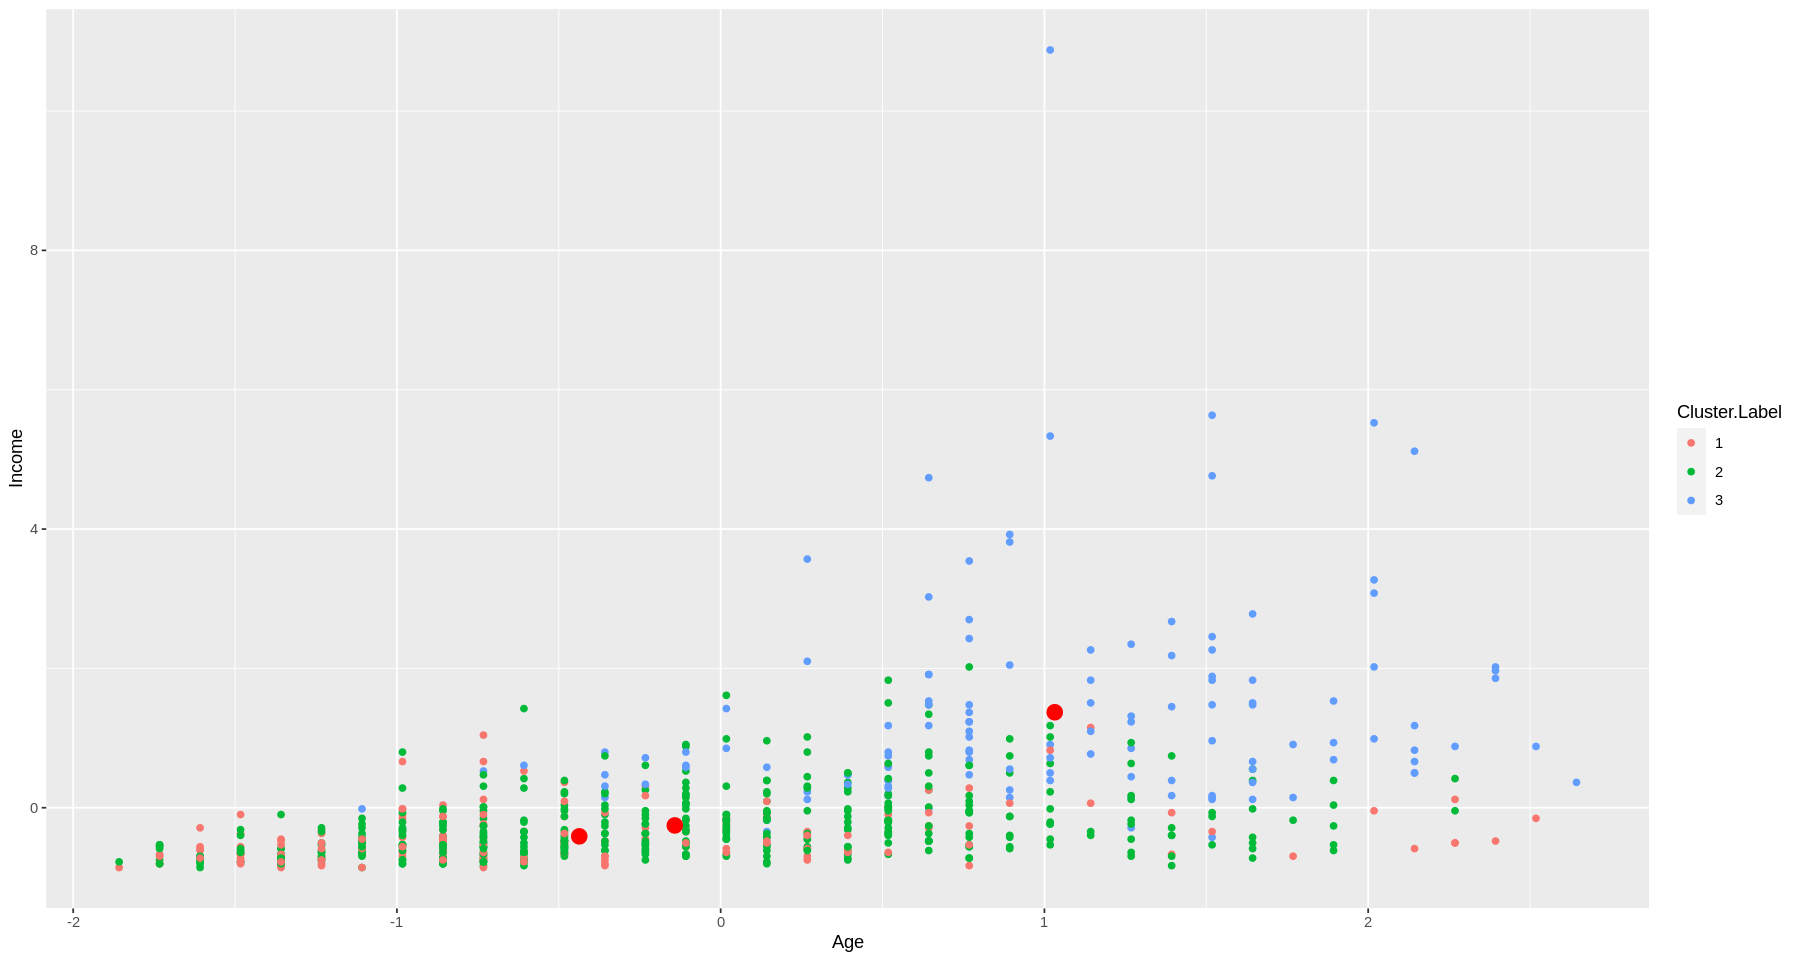

In [ ]:
# визуализация данных в разрезе возраста и дохода покупателя с центрами кластеров
ggplot() +
  geom_point(data = df_scaled, mapping = aes(x = Age, y = Income, colour = Cluster.Label)) +
    geom_point(mapping = aes(x = clust$centers[, "Age"], 
                                  y = clust$centers[, "Income"]),
                                  color = "red", size = 4)

Классификация

In [ ]:
# libraries
install.packages("naivebayes")
install.packages("psych")

library(naivebayes)
library(dplyr)
library(ggplot2)
library(psych)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘mnormt’


naivebayes 0.9.7 loaded


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




In [ ]:
# считываем датасет
getwd()
data <- read.csv('https://raw.githubusercontent.com/bkrai/Statistical-Modeling-and-Graphs-with-R/main/binary.csv')

[1] "/content"

In [ ]:
# содержимое данных
str(data)
summary(data) 

'data.frame':	400 obs. of  4 variables:
 $ admit: int  0 1 1 1 0 1 1 0 1 0 ...
 $ gre  : int  380 660 800 640 520 760 560 400 540 700 ...
 $ gpa  : num  3.61 3.67 4 3.19 2.93 3 2.98 3.08 3.39 3.92 ...
 $ rank : int  3 3 1 4 4 2 1 2 3 2 ...


     admit             gre             gpa             rank      
 Min.   :0.0000   Min.   :220.0   Min.   :2.260   Min.   :1.000  
 1st Qu.:0.0000   1st Qu.:520.0   1st Qu.:3.130   1st Qu.:2.000  
 Median :0.0000   Median :580.0   Median :3.395   Median :2.000  
 Mean   :0.3175   Mean   :587.7   Mean   :3.390   Mean   :2.485  
 3rd Qu.:1.0000   3rd Qu.:660.0   3rd Qu.:3.670   3rd Qu.:3.000  
 Max.   :1.0000   Max.   :800.0   Max.   :4.000   Max.   :4.000  

Поля датафрейма:
admit - принят ли в учебное заведение (да/нет);
gre - баллы за Graduate Record Examination - стандартизированный тест в аспирантуру за границей;
gpa - cредний балл, т.е. насколько хорошо вы набрали на своих курсах в среднем;
rank - рейтинг университета, откуда выпускник.

In [ ]:
# поля rank и admit категориальные переменные, приведем к фактору (строка-категория)
data$rank <- as.factor(data$rank)
data$admit <- as.factor(data$admit)

In [ ]:
# разбиение выборки на обучающую и тестовую выборки в пропорции 80% к 20% соответственно
set.seed(42)
ind <- sample(2, nrow(data), replace=TRUE, prob=c(0.8,.2))
train <- data[ind==1,]
test <- data[ind==2,]

In [ ]:
# модель Naive Bayes; admit как функция для всех остальных данных (.)
model <- naive_bayes(admit ~ ., data = train, usekernel = T)
model


================================== Naive Bayes ================================== 
 
 Call: 
naive_bayes.formula(formula = admit ~ ., data = train, usekernel = T)

--------------------------------------------------------------------------------- 
 
Laplace smoothing: 0

--------------------------------------------------------------------------------- 
 
 A priori probabilities: 

       0        1 
0.677116 0.322884 

--------------------------------------------------------------------------------- 
 
 Tables: 

--------------------------------------------------------------------------------- 
 ::: gre::0 (KDE)
--------------------------------------------------------------------------------- 

Call:
	density.default(x = x, na.rm = TRUE)

Data: x (216 obs.);	Bandwidth 'bw' = 35.36

       x               y            
 Min.   :193.9   Min.   :0.0000012  
 1st Qu.:372.0   1st Qu.:0.0002996  
 Median :550.0   Median :0.0012170  
 Mean   :550.0   Mean   :0.0014027  
 3rd Qu.:728.0   3rd Q

In [ ]:
# предсказание на тренировочно выборке
p <- predict(model, train, type= 'prob')
head(cbind(p, train))

Warning message:
“predict.naive_bayes(): more features in the newdata are provided as there are probability tables in the object. Calculation is performed based on features to be found in the tables.”


,0,1,admit,gre,gpa,rank
,<dbl>,<dbl>,<fct>,<int>,<dbl>,<fct>
3,0.1796866,0.8203134,1,800,4.00,1
5,0.8895321,0.1104679,0,520,2.93,4
6,0.6270414,0.3729586,1,760,3.00,2
7,0.5318809,0.4681191,1,560,2.98,1
8,0.8889455,0.1110545,0,400,3.08,2
9,0.7995766,0.2004234,1,540,3.39,3


In [ ]:
cat("# Misclassification error - train data:")
p1 <- predict(model, within(train, rm(admit)))
(tab1 <- table(p1, train$admit))
1 - sum(diag(tab1))/ sum(tab1)

cat("\n# Misclassification error - test data")
p2 <- predict(model, within(test, rm(admit)))
(tab2 <- table(p2, test$admit))
1 - sum(diag(tab2))/ sum(tab2)

# Misclassification error - train data:

   
p1    0   1
  0 200  74
  1  16  29

[1] 0.2821317


# Misclassification error - test data

   
p2   0  1
  0 52 20
  1  5  4

[1] 0.308642

Ошибка классификации на тестовой выборке составила 30.86%

Проверка на модели собственных данных

In [ ]:
# конструируем аналогичный фактор  
rank = as.factor(1:4)

# новые данные из 3х элементов
new <- data.frame(gre=c(230, 600, 800), gpa=c(2.0, 3.0, 4.0), rank=rank[c(4, 2, 1)])
new$rank <- as.factor(new$rank)
new$gre <- as.integer(new$gre)

# метки
p3 <- predict(model, new)

cbind(admit=p3, new)

admit,gre,gpa,rank
<fct>,<int>,<dbl>,<fct>
0,230,2,4
0,600,3,2
1,800,4,1
